In [1]:
""" --------------------------------------------------
This is the main script for the "Why  💪🤔💭" project.
PmXa, 06-2024
-------------------------------------------------- """

import matplotlib.pyplot as plt
import pandas as pd
import sqlite3

In [2]:
""" ---------------------------
Block 1:
Read the .sql or .xlsx database
--------------------------- """

sql_file:str = "/home/pmxa/Workout.sql"
xls_file:str = "/home/pmxa/Workout.xlsx"

def import_file(file:str) -> pd.DataFrame:
    file_ext:str = file.split(".")[-1]

    if file_ext == "sql":
        # connection = sqlite3.connect(file)
        # query = "SELECT * FROM 'post-op-1'"
        # data = pd.read_sql_query(query, connection)
        # connection.close()
        raise Exception("Sorry! This functionality is not implemented yet!")
        
    elif file_ext in ("xls", "xlsx"):
        data = pd.read_excel(file,
                             sheet_name = "Data")
    
    return data

In [3]:
""" ---------------------------------
🚧 Test Block 🚧
Add the values of options (1) and (2)
--------------------------------- """

test = 2

if test in (1, 3):
    test_data = import_file(sql_file)
    print(test_data.head(5))
if test in (2, 3):
    test_data = import_file(xls_file)
    print(test_data.head(5))

       Fecha  Asym. pushups  Squats  Head  Normal  Bottom up  Side up  Side  \
0 2023-11-16             30     150   120      20          6        6   200   
1 2023-12-10              5      15    20      10          2        4    20   
2 2023-12-12             10      20    20      10          2        4    20   
3 2023-12-14             10      20    20      10          2        6    30   
4 2023-12-17             12      25    32      10          2        6    30   

   Sym. pushups  Normal2  Double  Asym.  Swim  Side2  Side plank [s]  \
0            40       50      50     50    60    200             220   
1             5        5       5      6     5    100              40   
2             5        6       6      6     6    100              40   
3            10       10      10     10     5    120              42   
4            12       12      12     12     6    120              50   

   + leg rise  Lifts (bed)  Plank [s]  + spiders  + leg rise3  
0          20           80  

In [4]:
""" --------------------------------------------
Block 2:
Format and perform calculations on the Dataframe
-------------------------------------------- """

def process_data(raw_data: pd.DataFrame) -> pd.DataFrame:
    # processed_data = pd.DataFrame(["Fecha"])

    processed_data = raw_data[["Fecha"]].copy()
    # Get the days elapsed from reference
    processed_data["days"] = (raw_data["Fecha"] - raw_data.loc[0, "Fecha"]).dt.days

    # Compute the progress made
    processed_data["reps"] = raw_data.iloc[:, 1:-2].sum(axis=1)
    processed_data["progress"] = 100 * processed_data.loc[:, "reps"] / processed_data.loc[0, "reps"]

    return processed_data

In [5]:
""" ---------------------------------
🚧 Test Block 🚧
--------------------------------- """

print(process_data(test_data).head())

       Fecha  days  reps    progress
0 2023-11-16     0  1392  100.000000
1 2023-12-10    24   286   20.545977
2 2023-12-12    26   314   22.557471
3 2023-12-14    28   379   27.227011
4 2023-12-17    31   427   30.675287


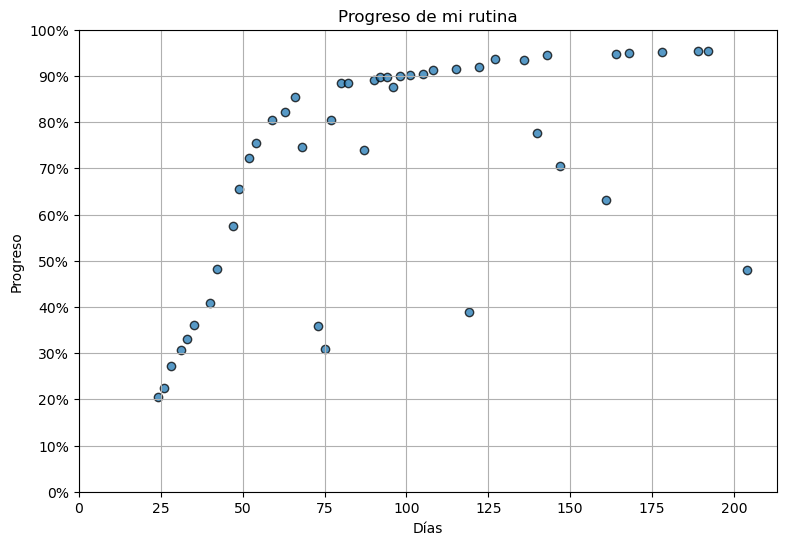

In [6]:
""" --------------------------------------------
Block 3:
Plot the results! 😁
-------------------------------------------- """

# Data

x_data = process_data(test_data)["days"]
y_data = process_data(test_data)["progress"]

y_range = range(0, 101, 10)
y_label = [f"{i:.0f}%" for i in y_range]

# Plot

plt.figure(figsize = (9,6))

plt.scatter(x_data[1:], y_data[1:],
            alpha = 0.75,
            edgecolors = (0,0,0))

plt.grid(True)
plt.xlim(0, None)
plt.ylim(0, 100)
plt.yticks(y_range, labels = y_label)

plt.title("Progreso de mi rutina")
plt.xlabel("Días")
plt.ylabel("Progreso")

plt.show()